El polinomio interpolador que pasa por los puntos del conjunto soporte
$\Omega = {(x_0, f(x_0)), (x_1, f(x_1)), (x_2, f(x_2))}$, 
Usamos el método de interpolación de Lagrange.
Se puede escribir como:

$$P_2(x) = f(x_0) L_0(x) + f(x_1) L_1(x) + f(x_2) L_2(x)$$

donde $L_i(x)$ son los polinomios
Estos estan dados por:

$$L_i(x) = \frac{(x - x_{j})(x - x_{k})}{(x_{i} - x_{j})(x_{i} - x_{k})}$$

donde $i,\neq j, \neq k$.

Obtenemos:

$$L_0(x) = \frac{(x - x_{1})(x - x_{2})}{(x_{0} - x_{1})(x_{0} - x_{2})}$$

$$L_1(x) = \frac{(x - x_{0})(x - x_{2})}{(x_{1} - x_{0})(x_{1} - x_{2})}$$

$$L_2(x) = \frac{(x - x_{0})(x - x_{1})}{(x_{2} - x_{0})(x_{2} - x_{1})}$$

=>

$$P_2(x) = \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)}f(x_0) + \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)}f(x_1) + \frac{(x - x_0)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)}f(x_2)$$

Este es el polinomio interpolador de grado 2 que pasa por los puntos del conjunto soporte $\Omega$
B)

$$P'_2(x) = \frac{d}{dx}\left[\frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)}f(x_0) + \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)}f(x_1) + \frac{(x - x_0)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)}f(x_2)\right]$$

=>

$$P'_2(x) = \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)}f'(x_0) \frac{d}{dx}\left[(x - x_0)(x - x_2)\right] + \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)}f'(x_1) \frac{d}{dx}\left[(x - x_1)(x - x_2)\right] + \frac{(x - x_0)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)}f'(x_2) \frac{d}{dx}\left[(x - x_0)(x - x_1)\right]$$

Derivada:

$$P'_2(x) = \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)}f'(x_0) (2x - x_0 - x_2) + \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)}f'(x_1) (2x - x_1 - x_2) + \frac{(x - x_0)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)}f'(x_2) (2x - x_0 - x_1)$$


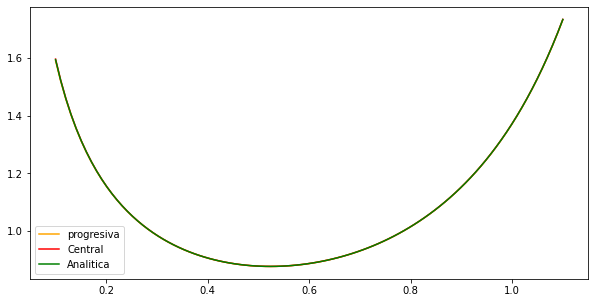

Se observa que los dos metodos tienen diferentes ordenes de presicion


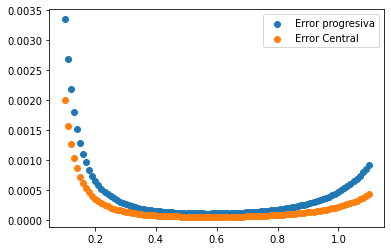

In [2]:
import mpmath
import numpy as np
import matplotlib.pyplot as plt

x= np.linspace(0.1,1.1,100)
h=0.01

tan = lambda x: np.sqrt(np.tan(x))
f = tan(x)

def Progresiva(x,f,h):
    valores = []
    for i in range(0,len(x)-2): 
        deriv = ((-f(x[i+2])+4*f(x[i+1])-3*f(x[i]))/2*h)*10000
        valores.append(deriv)
    valores.append(0)
    valores.append(0)    
        
    return valores

def Progresiva2(x,f,h): 
        deriv = ((-f(x+2*h)+4*f(x+h)-3*f(x))/2*h)*10000
    
        return deriv


def Central(x,f,h):
    return (f(x+h)-f(x-h))/(2*h)


DerivadaProgresiva = Progresiva2(x,tan,h)


DerivadaCentral = Central(x,tan,h)
Derivada = lambda x: 1/2*(1/(np.sqrt(np.tan(x))))*(1/np.cos(x))**2
DA= Derivada(x)

fig = plt.figure(figsize=(10,5))




plt.plot(x,DerivadaProgresiva, color = "orange")
plt.plot(x,DerivadaCentral , color = "red")
plt.plot(x,DA , color = "green")
plt.legend(["progresiva","Central","Analitica"])
plt.show()


plt.scatter(x,Derivada(x)-DerivadaProgresiva)
plt.scatter(x,abs(Derivada(x)-abs(DerivadaCentral)))
plt.legend(["Error progresiva" , "Error Central"])
print("Se observa que los dos metodos tienen diferentes ordenes de presicion")